In [371]:
import sys
import numpy as np
from scipy import ndimage
from scipy.misc import imsave



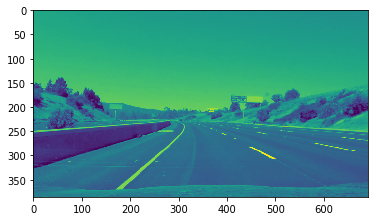

In [372]:
import matplotlib.pyplot as plt
im = ndimage.imread('real.png', mode='L')
plt.imshow(im)
plt.show()

In [373]:
im.shape

(386, 692)

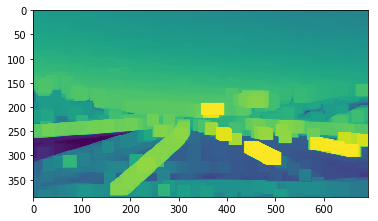

In [374]:
plt.imshow(ndimage.filters.maximum_filter(im, size=(25,25)))

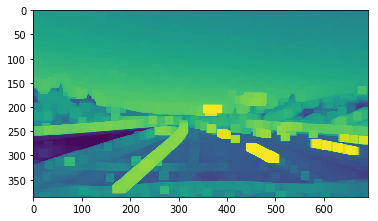

In [375]:
m = im
for x in xrange(4):
  m = ndimage.filters.maximum_filter(m, size=(5,5))
plt.imshow(m)

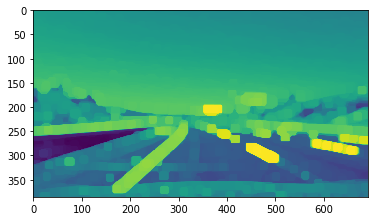

In [376]:
m = im
m = im
for x in xrange(4):
  m = ndimage.filters.maximum_filter(m, size=(5,5))
for x in xrange(2):
  m = ndimage.filters.median_filter(m, size=(5,5))
plt.imshow(m)


In [377]:
m2 = ndimage.zoom(m, 0.05)
np.percentile(m2, 95)

208.79999999999995

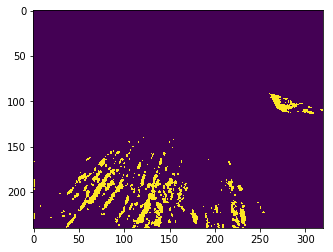

In [386]:
m = im
for x in xrange(2):
  m = ndimage.filters.maximum_filter(m, size=(2,2))
for x in xrange(0):
  m = ndimage.filters.median_filter(m, size=(5,5))
m2 = ndimage.zoom(m, 0.5)
m3 = m2 > np.percentile(m2, 95)
plt.imshow(m3.astype(np.int))

In [379]:
# x and y contain the index of points with something interesting
x, y = np.where((m3 > 0.0) == True)
X = np.column_stack((x, y))

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#X = StandardScaler().fit_transform(X.tolist())
db = DBSCAN(eps=5, min_samples=8).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_, labels

coords = []
for c in set(labels):
    # label -1 means "noise"
    if c != -1:
        class_member_mask = (labels == c)
        coords.append(X[class_member_mask])
n_clusters_       


NameError: name 'X' is not defined

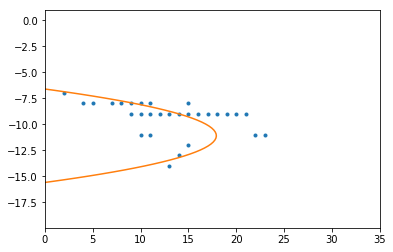

In [381]:
# try a polynomian
pol = []
for x in coords:
  pol.append(np.polyfit(x[:,0], x[:, 1], 2))


xp = np.linspace(0, m3.shape[0] , 100)
for c, po in zip(coords, pol):
   p = np.poly1d(po)
   _ = plt.plot(c[:,1], -c[:, 0], '.', p(xp), -xp, '-')
   
plt.xlim(0, m3.shape[1])
#plt.ylim(0,50)
plt.show()


In [382]:
def extract_lines(image):
    m = image
    for x in xrange(2):
      m = ndimage.filters.maximum_filter(m, size=(2,2))
    for x in xrange(0):
      m = ndimage.filters.median_filter(m, size=(5,5))
    m2 = ndimage.zoom(m, 0.1)
    m3 = m2 > np.percentile(m2, 97)
    
    x, y = np.where((m3 > 0.0) == True)
    X = np.column_stack((x, y)) 
    db = DBSCAN(eps=5, min_samples=10).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_clusters_, labels

    coords = []
    for c in set(labels):
        # label -1 means "noise"
        if c != -1:
            class_member_mask = (labels == c)
            coords.append(X[class_member_mask])
    pol = []
    for x in coords:
      pol.append(np.polyfit(x[:,0], x[:, 1], 2))


    xp = np.linspace(0, m3.shape[0] , 100)
    for c, po in zip(coords, pol):
       p = np.poly1d(po)
       _ = plt.plot(c[:,1], -c[:, 0], '.', p(xp), -xp, '-')

    plt.xlim(0, m3.shape[1])
    #plt.show()
    


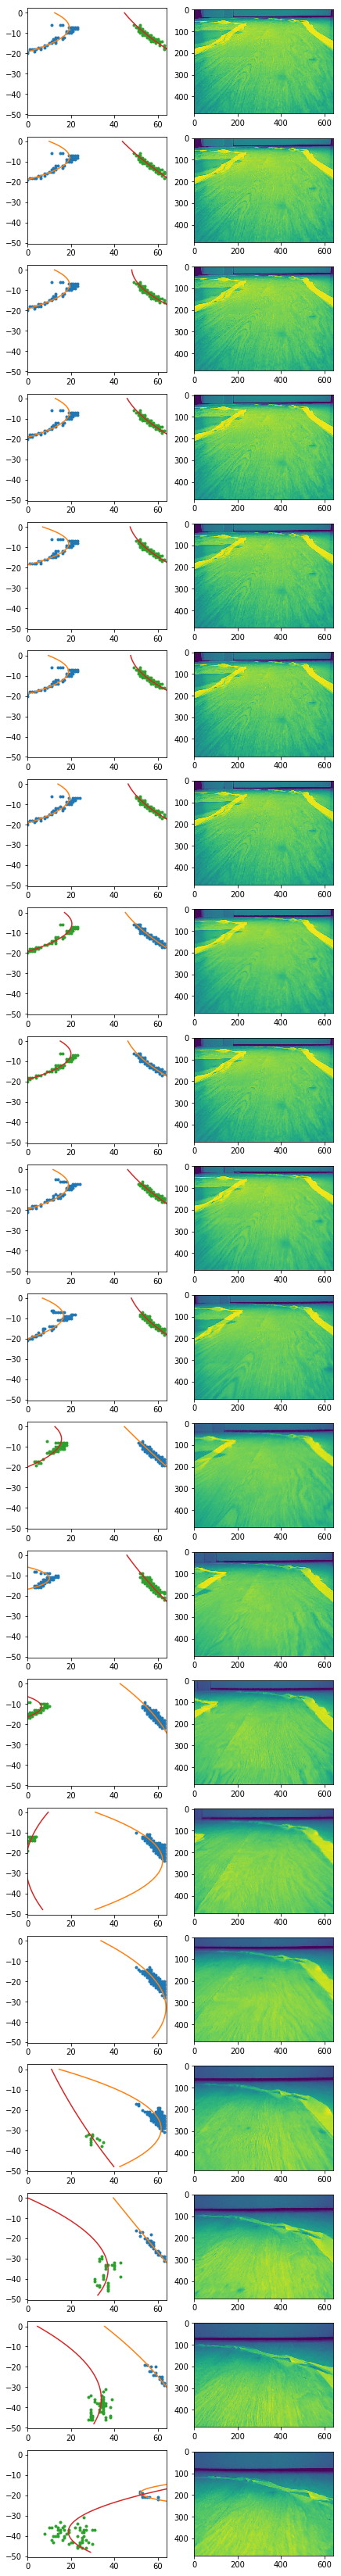

In [383]:
N = 20
STEP = 3
c = 0
plt.figure(figsize=(7,N*3))
for x in range(0, N):
    im = ndimage.imread('%02d.jpg' % (x*STEP), mode='L')
    plt.subplot(N, 2, 2*x + 1)
    extract_lines(im)
    #plt.imshow(m)
    plt.subplot(N, 2, 2*x + 2)
    plt.imshow(im)